**Binarização (THRESH_BINARY)**

A partir de uma imagem em escala de cinza, é possível definir um "*limiar*" (ponto de corte/threshold) onde todos os pixels que estiverem acima desse limiar vão ficar brancos (valor 255) e os que estiverem abaixo ficarão pretos (valor 0).

In [1]:
import cv2 # OpenCV
import numpy as np
from matplotlib import pyplot as plt

(np.float64(-0.5), np.float64(619.5), np.float64(388.5), np.float64(-0.5))

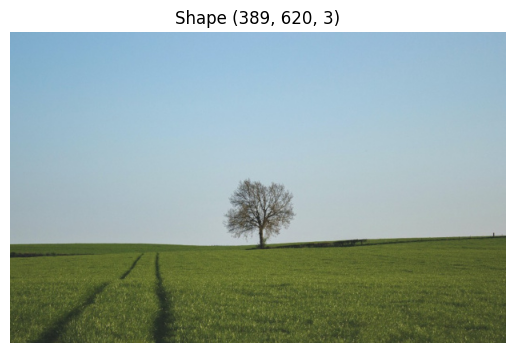

In [2]:
img = cv2.imread('images/paisagem01.jpg') # Lendo a Imagem (BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convertendo para RGB

plt.title(f'Shape {img.shape}')
plt.imshow(img)
plt.axis('off')

(np.float64(-0.5), np.float64(619.5), np.float64(388.5), np.float64(-0.5))

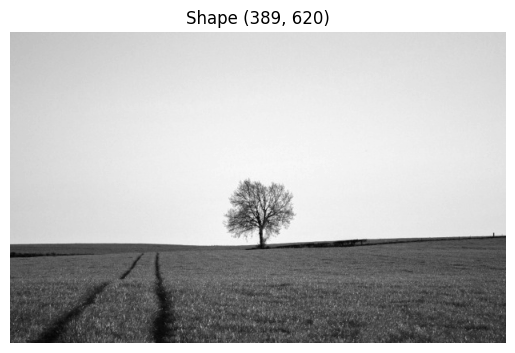

In [3]:
img_grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Converte para escala de cinza

plt.title(f'Shape {img_grayscale.shape}')
plt.imshow(img_grayscale, cmap='gray')
plt.axis('off')

In [4]:
limiar = 180 # threshold (ponto de corte)

In [5]:
val, thresh = cv2.threshold(img_grayscale, limiar, maxval=255, type=cv2.THRESH_BINARY) # maxval -> 255 será o valor que os pixels acima do limiar irão receber 

In [6]:
val # limiar

180.0

In [7]:
thresh # imagem binarizada

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

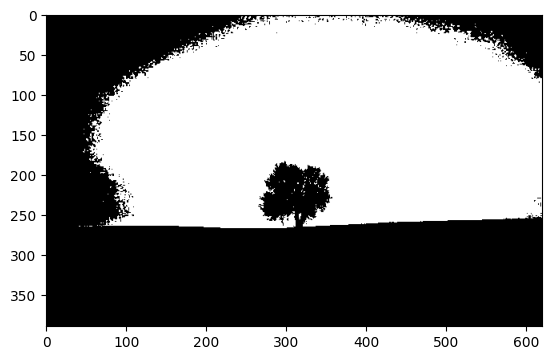

In [8]:
plt.imshow(thresh, cmap='gray')

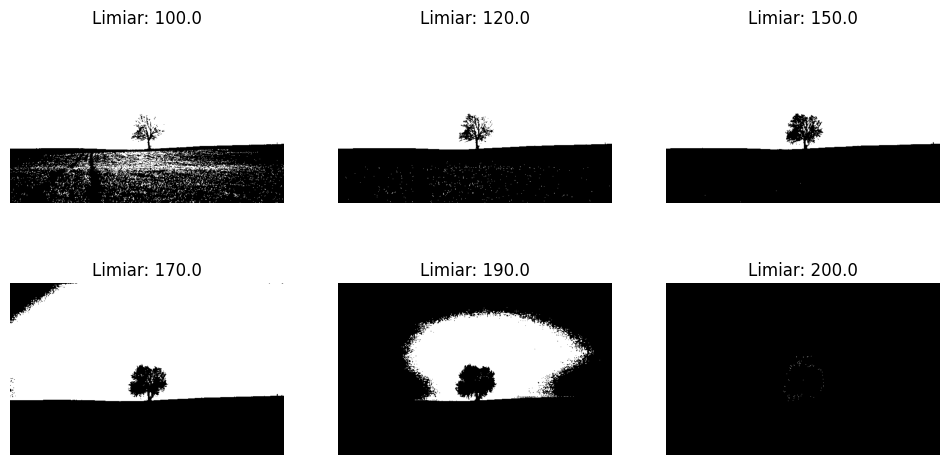

In [9]:
limiares = [100, 120, 150, 170, 190, 200]

plt.figure(figsize=(12,6))
for idx, li in enumerate(limiares):
    plt.subplot(2,3, idx +1)
    val_img, thresh_img = cv2.threshold(img_grayscale, li, maxval=255, type=cv2.THRESH_BINARY)

    plt.title(f'Limiar: {val_img}')
    plt.imshow(thresh_img, cmap='gray')
    plt.axis('off')

**THRESH_BINARY_INV**

Limiarização binária invertida em relação à limiarização binária normal.

(np.float64(-0.5), np.float64(619.5), np.float64(388.5), np.float64(-0.5))

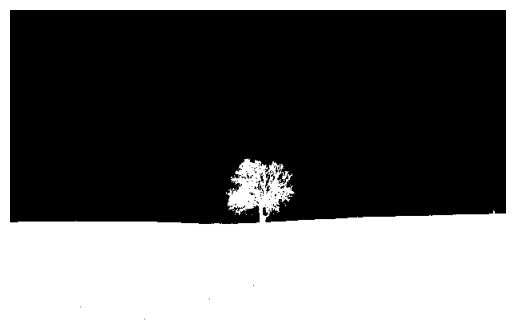

In [10]:
limiar = 150
_, thresh = cv2.threshold(img_grayscale, limiar, maxval=255, type=cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap='gray')
plt.axis('off')

**THRESH_TOZERO**

Tudo o que for abaixo desse limiar fica preto, e tudo o que está igual ou acima desse limiar fica como está.

(np.float64(-0.5), np.float64(619.5), np.float64(388.5), np.float64(-0.5))

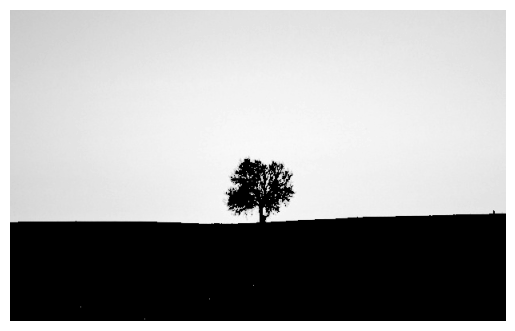

In [11]:
limiar = 150
_, thresh = cv2.threshold(img_grayscale, limiar, maxval=255, type=cv2.THRESH_TOZERO)

plt.imshow(thresh, cmap='gray')
plt.axis('off')

**THRESH_TOZERO_INV**

É o contrário do anterior, todos os pixels abaixo do limiar permanecem iguais. Tudo o que está igual ou maior que o limiar fica com a cor preta.

(np.float64(-0.5), np.float64(619.5), np.float64(388.5), np.float64(-0.5))

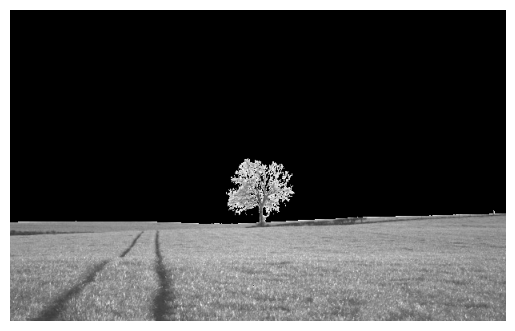

In [12]:
limiar = 150
_, thresh = cv2.threshold(img_grayscale, limiar, maxval=255, type=cv2.THRESH_TOZERO_INV)

plt.imshow(thresh, cmap='gray')
plt.axis('off')

**THRESH_TRUNC**

Tudo o que for abaixo desse limiar permanece como está; o que está acima fica com o valor de limiar fixo. Por isso o nome trunc (de "truncar"). Estabelece um teto e ao chegar nele o valor fica fixo nesse limiar, não havendo nenhum valor de pixel de intensidade superior ao limiar definido.

(np.float64(-0.5), np.float64(619.5), np.float64(388.5), np.float64(-0.5))

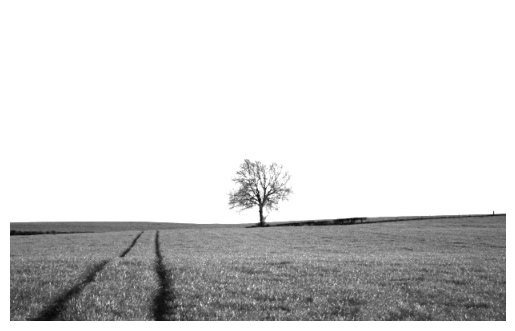

In [13]:
limiar = 150
_, thresh = cv2.threshold(img_grayscale, limiar, maxval=255, type=cv2.THRESH_TRUNC)

plt.imshow(thresh, cmap='gray')
plt.axis('off')

In [14]:
def limiarizacao(image, valor_limiar):
    _, binary = cv2.threshold(image, valor_limiar, maxval=255, type=cv2.THRESH_BINARY)
    _, binary_inv = cv2.threshold(image, valor_limiar, maxval=255, type=cv2.THRESH_BINARY_INV)
    _, tozero = cv2.threshold(image, valor_limiar, maxval=255, type=cv2.THRESH_TOZERO)
    _, tozero_inv = cv2.threshold(image, valor_limiar, maxval=255, type=cv2.THRESH_TOZERO_INV)
    _, trunc = cv2.threshold(image, valor_limiar, maxval=255, type=cv2.THRESH_TRUNC)

    imgs = [image, binary, binary_inv, tozero, tozero_inv, trunc]
    titles = ["Original", "Binary", "Binary Inv", "To Zero", "To Zero Inv", "Trunc"]

    plt.figure(figsize=(12,6))
    for idx, (img, title) in enumerate(zip(imgs, titles)):
        plt.subplot(2,3, idx +1)
        plt.title(title)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

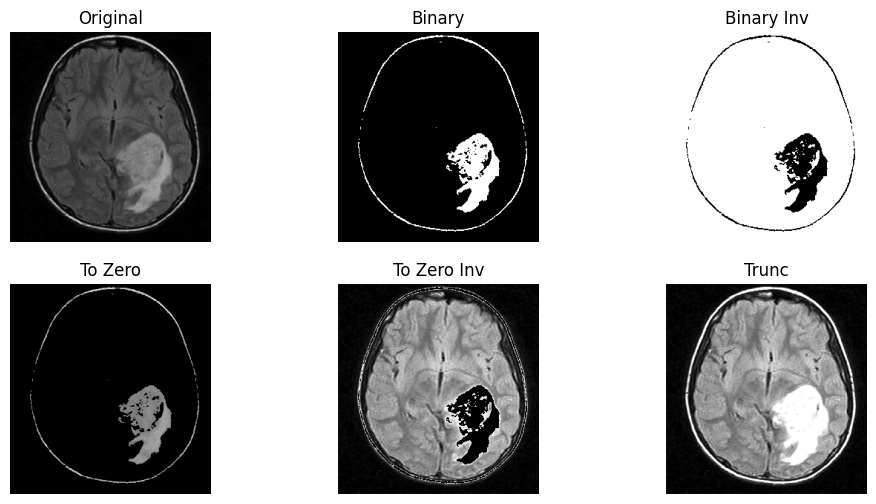

In [15]:
img_brain = cv2.imread('images/ct-scan.jpg')
img_brain = cv2.cvtColor(img_brain, cv2.COLOR_BGR2GRAY) # Convertendo diretamente para escala de cinza

limiarizacao(img_brain, 110)

### Exercícios

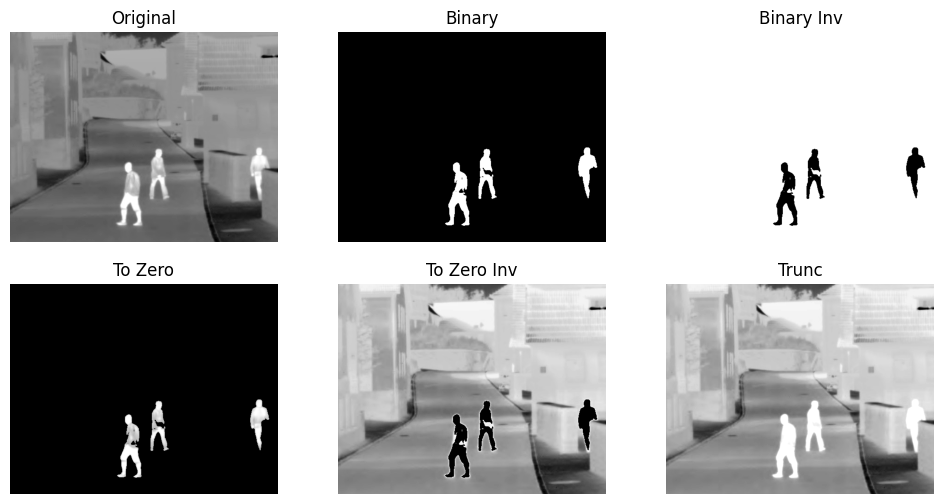

In [16]:
img_1 = cv2.imread('images/thermal01.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

limiarizacao(img_1, 180)

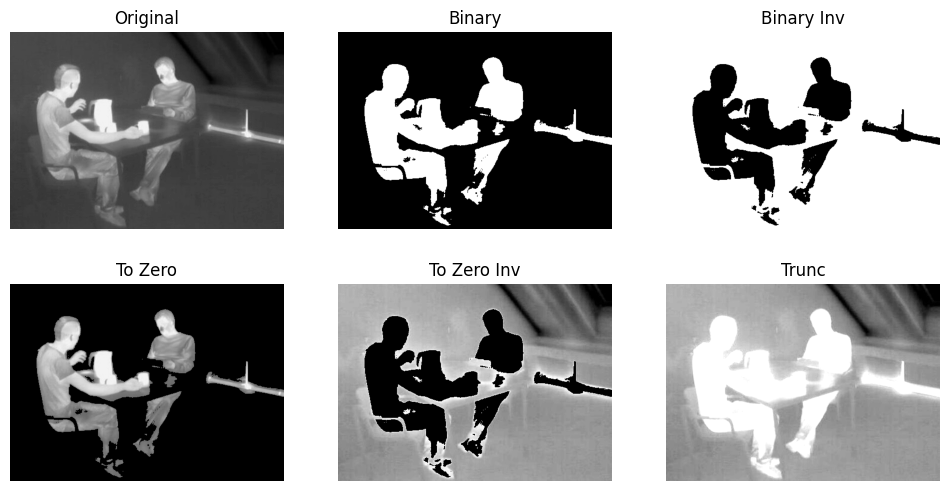

In [17]:
img_2 = cv2.imread('images/thermal02.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

limiarizacao(img_2, 100)

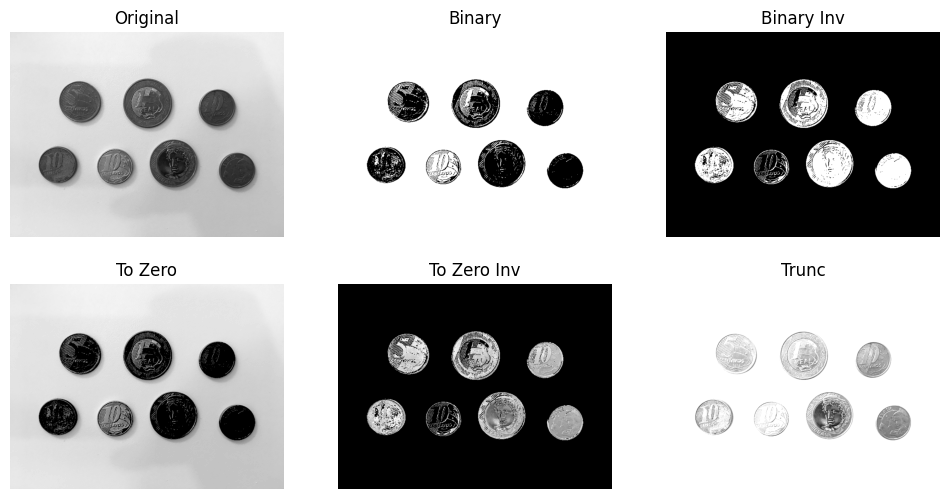

In [18]:
moedas = cv2.imread('images/moedas01.jpg')
moedas = cv2.cvtColor(moedas, cv2.COLOR_BGR2RGB)
moedas_grayscale = cv2.cvtColor(moedas, cv2.COLOR_RGB2GRAY)

limiarizacao(moedas_grayscale, 100)

**Removendo o fundo das moedas**

(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

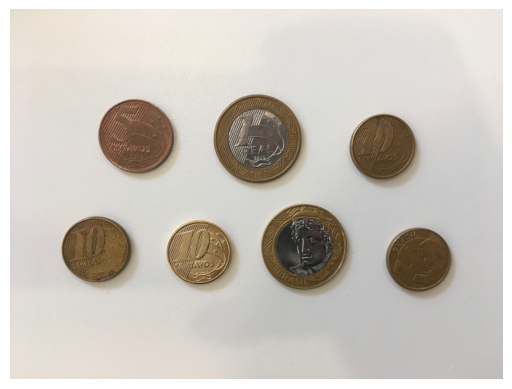

In [19]:
plt.imshow(moedas)
plt.axis('off')

(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

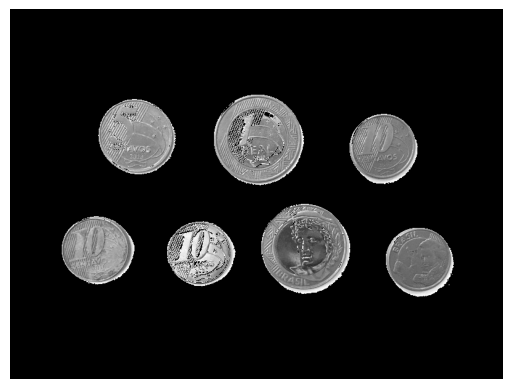

In [20]:
_, moedas_tozero_inv = cv2.threshold(moedas_grayscale, 150, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(moedas_tozero_inv, cmap='gray')
plt.axis('off')

In [21]:
mask = np.zeros(moedas.shape, dtype=np.bool)

moedas_tozero_inv = np.stack([moedas_tozero_inv]*3, axis=-1) # Aumentando de 1 canal para 3 canais
mask = moedas_tozero_inv > 0 # Caso for maior que zero, retorna True, caso não, False

(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

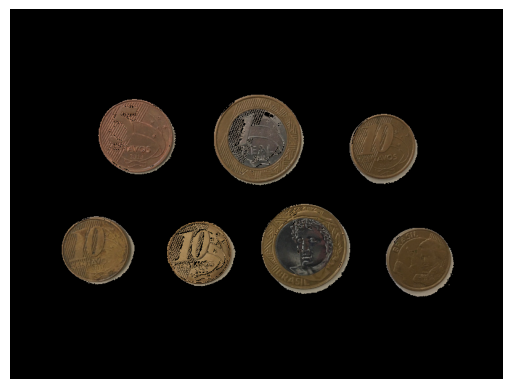

In [22]:
moedas_sem_fundo = mask * moedas
plt.imshow(moedas_sem_fundo)
plt.axis('off')

### Binarização (na mão)

(np.float64(-0.5), np.float64(619.5), np.float64(388.5), np.float64(-0.5))

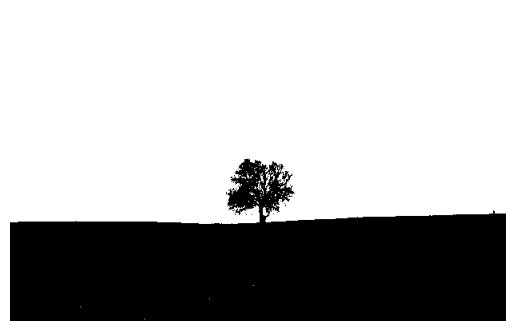

In [23]:
limiar = 150

# Virá branco caso for maior que o limiar, preto caso menor
img_binary = [[255 if pixel_y > limiar else 0 for pixel_y in pixel_x] for pixel_x in img_grayscale]
plt.imshow(img_binary, cmap='gray')
plt.axis('off')